In [33]:
import numpy as np
#import scvelo as scv
import seaborn as sns
import itertools
from sklearn.kernel_ridge import KernelRidge
import scanpy as sc

In [34]:
adata = sc.read('hsc.h5ad')
adata

AnnData object with n_obs × n_vars = 1947 × 21418
    obs: 'batch', 'cell_type', 'time', 'nGenes'
    var: 'gene_name_mapping'
    obsm: 'X_umap'
    layers: 'new', 'spliced', 'total', 'unspliced', 'velocity_alpha_minus_gamma_s'

In [35]:
#scv.pp.filter_genes(adata, min_shared_counts=20)
sc.pp.normalize_per_cell(adata)
sc.pp.filter_genes_dispersion(adata, n_top_genes=2000)
sc.pp.log1p(adata)

C:\Users\user\AppData\Local\Temp\ipykernel_23340\3751388722.py:2: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(adata)
c:\Users\user\OneDrive\Desktop\bio596\bioenv\Lib\site-packages\scanpy\preprocessing\_simple.py:589: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(
C:\Users\user\AppData\Local\Temp\ipykernel_23340\3751388722.py:3: FutureWarning: Use sc.pp.highly_variable_genes instead
  sc.pp.filter_genes_dispersion(adata, n_top_genes=2000)
c:\Users\user\OneDrive\Desktop\bio596\bioenv\Lib\site-packages\scanpy\preprocessing\_deprecated\highly_variable_genes.py:140: FutureWarning: Use sc.pp.highly_variable_genes instead
  result = filter_genes_dispersion(
c:\Users\user\OneDrive\Desktop\bio596\bioenv\Lib\site-packages\scanpy\preprocessing\_deprecated\highly_variable_genes.py:131: UserWarning: If you pass `n_top_genes`, all cutoffs are ignored.
  warnings.warn(msg, UserWarning)


In [36]:
X = np.asarray(adata.X.todense())
Y = np.asarray(adata.layers['velocity_alpha_minus_gamma_s'].todense())
Y[np.isnan(Y)] = 0
idx_velocity = np.where(abs(Y).sum(0) > 10)[0]
Y = Y[:,idx_velocity]
X.shape, Y.shape

((1947, 1999), (1947, 281))

In [37]:
idx_test = np.random.choice(X.shape[0],100,replace=False)
idx_train = np.setdiff1d(np.arange(X.shape[0]),idx_test)
X_train, Y_train = X[idx_train], Y[idx_train]
X_test, Y_test = X[idx_test], Y[idx_test]

In [38]:
#regk = KernelRidge(alpha=0,kernel='polynomial',degree=3)
regk = KernelRidge(alpha=0,kernel='rbf',gamma=0.1) #　gauusian kernel
regk.fit(X_train,Y_train) 
print(regk.score(X_train,Y_train), regk.score(X_test,Y_test)) # R^2 score, 1 is perfect fit, 0 is no fit

1.0 -0.017075416587999666


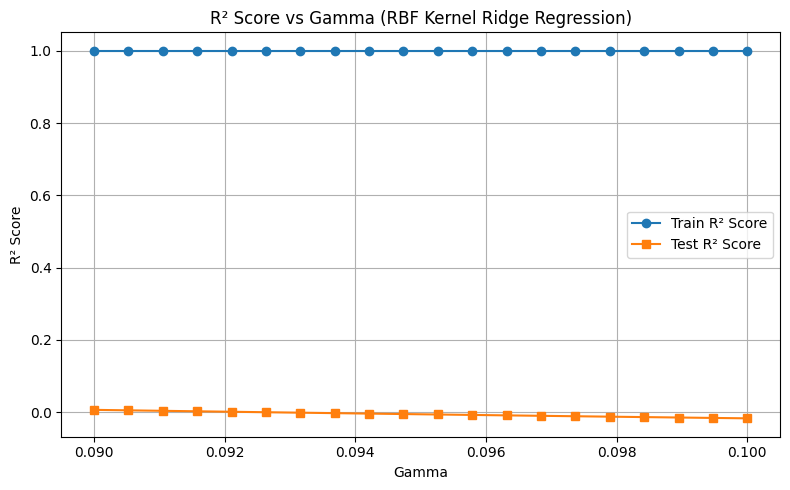

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

# Generate gamma values from 0.1 to 0.09
gammas = np.linspace(0.1, 0.09, 20)

# Lists to store R² scores
train_scores = []
test_scores = []

# Loop through each gamma and record R² scores
for gamma in gammas:
    regk = KernelRidge(alpha=0, kernel='rbf', gamma=gamma)
    regk.fit(X_train, Y_train)
    train_scores.append(regk.score(X_train, Y_train))
    test_scores.append(regk.score(X_test, Y_test))

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(gammas, train_scores, label='Train R² Score', marker='o')
plt.plot(gammas, test_scores, label='Test R² Score', marker='s')
plt.xlabel('Gamma')
plt.ylabel('R² Score')
plt.title('R² Score vs Gamma (RBF Kernel Ridge Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
